<center><h1>Multiclass Classification with Perceptron on MNIST Dataset</h1></center>

<h3>Step 1. <i>"Getting Data"</i></h3>
First, we get all the image samples from the sklearn library. In the meantime, we import the OneHotEncoder library to encode the data target into one hot. It means the classes in the dataset will be converted into array of booleans that indicates the class itself. For example, if the class chosen is 3 out of 10 classes, the array is [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]. This method will be used for single perceptron multiclass clasification with 'one vs all' strategy. And same as the last question, we will be split the dataset into 80% training data and 20% test data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load digits datasets
digits = load_digits()

# get the dataset and reshape into array of numpy with input data and output
def get_dataset():
    dataset_input = digits.data
    dataset_output = digits.target
    # encode the data into one hot
    dataset_output = \
    OneHotEncoder(sparse = False).fit_transform(dataset_output.reshape(-1, 1))

    return dataset_input, dataset_output

dataset_input, dataset_output = get_dataset()

x_train, x_test, y_train, y_test = \
    train_test_split(dataset_input,
                     dataset_output,
                     test_size = 0.2,
                     random_state = 42)

<h3><i>"The Architecture"</i></h3>
In order the perceptron to be able to do multiclass classification, we must assign the perceptron in such a way that it will be able to classify every class that exists. This can be achieved by adding a layer of perceptrons that every perceptron will classify each class. The architecture can be viewed below.

![Single Layer Perceptron](SLP.png)

<h3>Step 2. <i>"Initialization"</i></h3>
For the initial parameter, the weights and bias initialized has a different dimension than in binary classification. Because there will be more than one perceptron, the weight will be correspondent to the amount of the perceptrons. In this case, the weight will be 10 and 64 dimension. 10 because there are 10 total perceptron, and 64 because the length of each data is 64. Meanwhile, the amount of the bias will the same by the perceptrons. For the convenience, we add the learning rate for faster training.

In [2]:
def init_params():
    w = np.zeros((10,64))
    b = np.zeros(10)
    return w, b

w, b = init_params()

train_result = {
    "prediction":[],
    "target": [],
    "sum_error": [],
    "epoch": []
}

epoch = 100
learning_rate = 0.5

<h3>Training Methods</h3>
<p>From my analysis. There are two method we will be used for the training. The difference will be consist of calculating the score of each class and updating the weight and bias.</p>
    <p>In method 1, every net input will be go through activation function to produce an output. And then the updation of weight and bias will be the same for each array of weights and biases.</p>
    <p>However, In method 2, the net input will not go through activation function, rather it will be counted by the highest score. After that, the class with the highest score will be compared with target class. if the prediction and target is not the same, The weight of the target class will be summed by the input, meanwhile the weight of predicted class will be reduced by the input. For this method, bias will be not used.


<h3>Step 3. <i>"Training"</i> (Method 1)</h3>
For this training, we will be using step function to determine prediction. Each iteration, every weights and bias that correspond with the inputs will be multiplied until array of boolean with size of available classes is produced. After that, each element in the array will be compared by array of target. If an error is found, the weight that correspond with the position of the target array will be updated. This update method is the same with bias. Finally, it loops until n-epochs. For this case, the epoch will be 50

In [3]:
print("Training ...")
# hardlimit function
def hardlim(x):
    if x >= 0:
        return 1
    else:
        return 0

sum_e = 0
# Training Session
for i in range(epoch):
    inner_arr = []
    if (i+1) % 20 == 0:
        print("Epoch = {}".format(i+1))
    for j in range(len(x_train)):
        a = []
        for k in range(len(w)):
            a_mul = hardlim(np.matmul(w[k], x_train[j]) + b[k])
            a.append(a_mul)
        t = y_train[j]
        e = t - a
        train_result["prediction"].append(a)
        train_result["target"].append(t)
        train_result["epoch"].append(i)
        train_result["sum_error"].append(sum_e)
        inner_arr.append(np.sum(np.absolute(e)))
        # Update Weights
        for l in range(len(w)):
            w[l] = w[l] + e[l] * learning_rate * x_train[j]

        # Update Bias
        for l in range(len(b)):
            b[l] = b[l] + e[l] * learning_rate
    sum_e = np.sum(np.absolute(inner_arr))
    
print("Training Finished ...")

Training ...
Epoch = 20
Epoch = 40
Epoch = 60
Epoch = 80
Epoch = 100
Training Finished ...


The training result is showed by the graph below which shows the sum of error in each epochs.

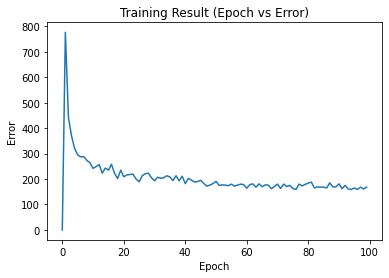

In [4]:
plt.plot(train_result["epoch"], train_result["sum_error"])
plt.title("Training Result (Epoch vs Error)")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()

<h3>Step 4. <i>"Testing"</i> (Method 1)</h3>
After training is finished, we can test the model using 20% of the original dataset splitted earlier. After the test, the accuracy will be showed

In [5]:
test_result = {
    "N_Data": [],
    "Prediction": [],
    "Target": [],
    "Error": []
}


# Test Session
for i in range(len(x_test)):
    a = []
    for j in range(len(w)):
        a_mul = hardlim(np.matmul(w[j], x_test[i]) + b[j])
        a.append(a_mul)
    t = y_test[i]
    e = t - a
    test_result["N_Data"].append(i)
    test_result["Prediction"].append(np.argmax(a))
    test_result["Target"].append(np.argmax(t))
    test_result["Error"].append(np.sum(np.absolute(e)))
    #uncomment to show the prediction in realtime
    #if np.argmax(t) != np.argmax(a):
    #    print("Target = {}, Prediction = {} !".format(np.argmax(t), np.argmax(a)))
    #else:
    #    print("Target = {}, Prediction = {}".format(np.argmax(t), np.argmax(a)))


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_result["Target"], test_result["Prediction"])
print("Accuracy = {}%".format(accuracy * 100))

Accuracy = 89.44444444444444%


Graph below shows the error in every n-prediction.

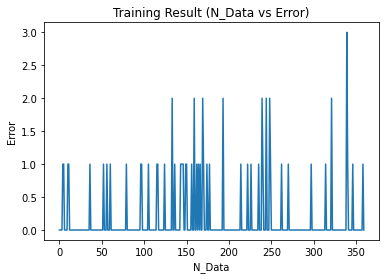

In [6]:
plt.plot(test_result["N_Data"], test_result["Error"])
plt.title("Training Result (N_Data vs Error)")
plt.xlabel("N_Data")
plt.ylabel("Error")
plt.show()

And finally we show the confusion matrix to analyze the accuracy & performance of the model

----- Confusion matrix -----


<AxesSubplot:>

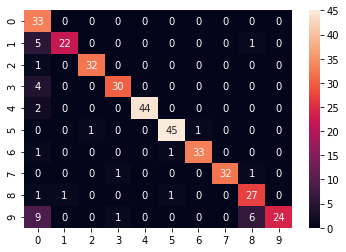

In [7]:
# Summary
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_result["Target"], test_result["Prediction"])
print("----- Confusion matrix -----")
sns.heatmap(conf_matrix, annot=True)

From the performance above, we can conclude that this model can perform multiclass clasification with accuration of slightly accurate (89.4%). Next, we can try to train the perceptron with the second method.

<h3>Step 5. <i>"Training"</i> (Method 2)</h3>
For this method, the weight will be updated by the comparation of target and prediction. if the prediction's value is not the same as target, the weight of the prediction will be reduced and the weight of the target will be increased. This training will be performed for 100 epoch.

In [8]:
train_result = {
    "prediction":[],
    "target": [],
    "sum_error": [],
    "epoch": []
}

test_result = {
    "N_Data": [],
    "Prediction": [],
    "Target": [],
    "Error": []
}

print("Training ...")
sum_e = 0
# Training Session
for i in range(epoch):
    inner_arr = []
    if (i+1) % 20 == 0:
        print("Epoch = {}".format(i+1))
    for j in range(len(x_train)):
        a = []
        for k in range(len(w)):
            a_mul = np.dot(w[k], x_train[j])
            a.append(a_mul)
        t = y_train[j]

        train_result["prediction"].append(a)
        train_result["target"].append(t)
        train_result["epoch"].append(i)
        train_result["sum_error"].append(sum_e)
        if np.argmax(a) != np.argmax(t):
            e = 1
        else:
            e = 0
        inner_arr.append(e)
        
        if np.argmax(a) != np.argmax(t):
            w[np.argmax(t), :] = w[np.argmax(t), :] + x_train[j]
            w[np.argmax(a), :] = w[np.argmax(a), :] - x_train[j]

    sum_e = np.sum(inner_arr)
print("Training finished ...")

Training ...
Epoch = 20
Epoch = 40
Epoch = 60
Epoch = 80
Epoch = 100
Training finished ...


After the training, we can analyze the reduction of error by the graph below.

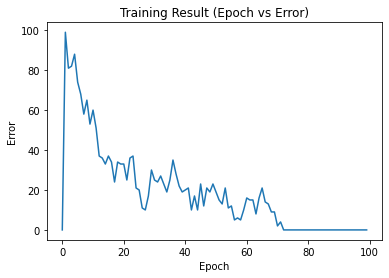

In [9]:
plt.plot(train_result["epoch"], train_result["sum_error"])
plt.title("Training Result (Epoch vs Error)")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()

From the graph above, the error is reduced by 0 at 60 - 80 epoch. Now, with this model, we can test the classification.

In [10]:
print("Testing ...")
# Test Session
for i in range(len(x_test)):
    a = []
    for j in range(len(w)):
        a_mul = np.matmul(w[j], x_test[i])
        a.append(a_mul)
    #print("Prediction = {}".format(a))
    t = y_test[i]
    test_result["N_Data"].append(i)
    test_result["Prediction"].append(np.argmax(a))
    test_result["Target"].append(np.argmax(t))
    if np.argmax(a) != np.argmax(t):
        e = 1
    else:
        e = 0
    test_result["Error"].append(e)
    # print("Target = {}, Prediction = {}".format(np.argmax(t), np.argmax(a)))

print("Testing finished ...")
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_result["Target"], test_result["Prediction"])
print("Accuracy = {}%".format(accuracy * 100))

Testing ...
Testing finished ...
Accuracy = 96.11111111111111%


After testing, show the error graph below.

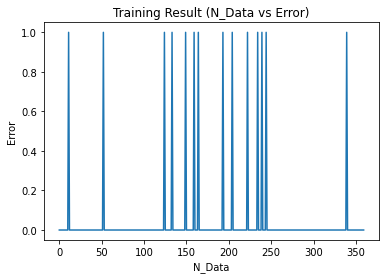

In [11]:
plt.plot(test_result["N_Data"], test_result["Error"])
plt.title("Training Result (N_Data vs Error)")
plt.xlabel("N_Data")
plt.ylabel("Error")
plt.show()

And lastly, show the confusion matrix

----- Confusion matrix -----


<AxesSubplot:>

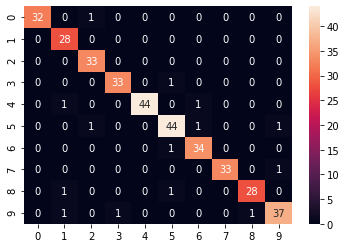

In [12]:
# Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_result["Target"], test_result["Prediction"])
print("----- Confusion matrix -----")
sns.heatmap(conf_matrix, annot=True)

From the result above, we can conclude that the second method used for perceptron training is slightly more accurate by the first method (89.4% vs 96.1%). However, the second method leads for overfitting more easily than the first method. Overfitting can be caused when the model is performing very good on training session, but when the model tries to classify the testing dataset, the result is not as good as the training session. Meanwhile, the error in the first method is still can be reduced by more epoch, leads to better classification. 